In [1]:
import pandas as pd
import numpy as np
import mne

In [2]:
electrodes=['P3', 'C3', 'F3', 'Fz', 'F4', 'C4', 'P4', 'Cz', 'Pz', 'Fp1', 'Fp2', 'T3', 'T5', 'O1', 'O2', 'F7', 'F8', 'T6', 'T4']
fs=300 #частота дискретизации ээг
def THE_MOST_STUPID_FUNCTION(eeg_producta):
    list_eeg={}
    for i in electrodes:
        eeg_producta_i=np.delete(np.array(eeg_producta[i].split('[')), [0, 1])
        s=[]
        for j in range(len(eeg_producta_i)):
            vrem=eeg_producta_i[j].split(',')[:-1]
            vrem[-1]=vrem[-1][:-1]
            for k in range(len(vrem)):
                vrem[k]=float(vrem[k])
            s=s+vrem
        list_eeg[f'{i}']=s
    return list_eeg

def get_all_psd(eeg):
    eeg_float={}
    s={}
    for i in range(len(eeg)):
        eeg_producta=eeg.loc[i]
        krivie_ruki=THE_MOST_STUPID_FUNCTION(eeg_producta=eeg_producta)
        pp=eeg['product_page'].loc[i]
        pn=eeg['product_number'].loc[i]
        
        eeg_psded=0
        s[f'{pp} {pn}']=[eeg['index'].loc[i], eeg['info'].loc[i], eeg_psded]
        eeg_float[f'{pp} {pn}']=[eeg['index'].loc[i], eeg['info'].loc[i], krivie_ruki]
    return (s, eeg_float)

people=['01', '02', '03', '05', '06', '07', '08', '09', '10', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44']
electrodes=['P3', 'C3', 'F3', 'Fz', 'F4', 'C4', 'P4', 'Cz', 'Pz', 'Fp1', 'Fp2', 'T3', 'T5', 'O1', 'O2', 'F7', 'F8', 'T6', 'T4']
fs=300
df_vrem=pd.DataFrame(columns=['product_page_number', 'info', 'P3', 'C3', 'F3', 'Fz', 'F4', 'C4', 'P4', 'Cz', 'Pz', 'Fp1', 'Fp2', 'T3', 'T5', 'O1', 'O2', 'F7', 'F8', 'T6', 'T4'])
for t in people:
    eeg=pd.read_csv(f'извлеченные_ээг/eeg_S{t}.csv')
    evrika, eeg_float=get_all_psd(eeg=eeg)
    for i in eeg_float:
        df_vrem.loc[len(df_vrem.index)]=[i, eeg_float[i][1], eeg_float[i][2]['P3'],  eeg_float[i][2]['C3'],  eeg_float[i][2]['F3'],  eeg_float[i][2]['Fz'],  eeg_float[i][2]['F4'],  eeg_float[i][2]['C4'],  eeg_float[i][2]['P4'],  eeg_float[i][2]['Cz'],  eeg_float[i][2]['Pz'],  eeg_float[i][2]['Fp1'],  eeg_float[i][2]['Fp2'],  eeg_float[i][2]['T3'],  eeg_float[i][2]['T5'],  eeg_float[i][2]['O1'],  eeg_float[i][2]['O2'],  eeg_float[i][2]['F7'],  eeg_float[i][2]['F8'],  eeg_float[i][2]['T6'],  eeg_float[i][2]['T4']]


In [3]:
df_vrem

,product_page_number,info,P3,C3,F3,Fz,F4,C4,P4,Cz,...,Fp1,Fp2,T3,T5,O1,O2,F7,F8,T6,T4
0,Page1 0,"{'Bought': 0, 'Reasons': [], 'Familiarity': 0,...","[6.511624565954574, 6.890339681978484, 7.04791...","[1.9735072833038174, 1.6912671651119324, 1.088...","[-13.663424789553144, -13.288257822583109, -12...","[-1.2626322975512119, -1.0850765316761237, -0....","[-3.4447362739840486, -3.4761841312343846, -3....","[-0.9215066908380872, -0.728643615814696, -0.5...","[3.8405385820332985, 4.49471437337068, 5.09715...","[0.8548347410662942, 0.9164246061992112, 1.004...",...,"[-21.015714319718168, -20.761897050727878, -19...","[-13.121896502295959, -13.191186037294953, -12...","[0.3864409716088808, -0.7298435989728731, -2.4...","[9.948028512453027, 10.167699071244604, 10.079...","[11.198039807872737, 11.743789693020632, 11.86...","[5.089997682116887, 6.183077571677555, 7.50331...","[-24.71970508052686, -24.55931740480053, -24.2...","[-0.4369746731655312, 0.43927261797395634, 1.5...","[6.133394595485935, 7.30839794434627, 8.594914...","[5.250415460704896, 5.170446107650037, 4.94109..."
1,Page1 1,"{'Bought': 0, 'Reasons': [], 'Familiarity': 0,...","[-1.2549047519936847, 0.9134356856991255, 3.25...","[-1.4202792253378398, -0.19254157221640045, 1....","[-7.977386435582023, -9.551373698918491, -11.2...","[4.355951106464545, 3.1867315975663857, 1.5373...","[0.8754074712434561, 0.09599189923910911, -1.0...","[-1.1522636571871994, -0.9586634443896376, -0....","[-0.3310030143261543, 0.34022443459226337, 1.7...","[4.340729889230897, 3.8035989835392403, 2.9723...",...,"[-6.451783102171047, -10.424809929505454, -14....","[-2.017917364966341, -4.722771981677758, -8.00...","[-10.242015101795156, -6.9267058984166585, -3....","[1.158547483225734, 3.6640470784569006, 6.5014...","[-0.2689594269643193, 2.82631685532524, 6.4973...","[2.5096020664309804, 2.731405452979201, 2.9327...","[-16.819620679774964, -18.997273225855817, -21...","[4.961607184266291, 3.587475439508866, 1.55769...","[6.723283866269348, 6.458234307591, 5.70240985...","[4.570872852472049, 4.987055555651538, 5.26331..."
2,Page1 2,"{'Bought': 0, 'Reasons': [], 'Familiarity': 0,...","[13.121708433187555, 12.509060487302973, 13.43...","[7.688418223173944, 7.457237092855296, 7.97948...","[4.381839914005072, 3.047007147929164, 2.94675...","[5.431037100045795, 3.1510225868231103, 2.0580...","[0.728675542684567, -0.853773563541658, -1.889...","[0.929985415993761, -1.455964982220128, -0.876...","[6.521799141979645, 7.132231722024411, 8.41502...","[6.533582197513108, 4.811115542453948, 6.46380...",...,"[3.2289718148506568, 2.215711626108125, 2.1779...","[-1.803872984869257, -1.9387962236668381, -1.6...","[1.3476980805259897, 0.12700950549068546, 0.98...","[8.877344445299023, 7.495693646941758, 7.30200...","[4.77346720674749, 4.884057757775336, 5.295200...","[12.747592874526902, 14.568933736992738, 16.30...","[-3.5681245551291854, -3.677996229061066, -2.9...","[-5.45294404058336, -6.15102723281231, -5.2702...","[-1.2861775908599005, -3.2786071068437592, -0....","[-8.367057299627945, -9.799016106320456, -8.67..."
3,Page1 3,"{'Bought': 1, 'Reasons': ['discount', 'combina...","[0.7586719793308871, 3.7059941635699083, 5.983...","[6.9197916370651615, 9.506495014560233, 10.876...","[13.536285892561292, 14.547366696026963, 14.81...","[1.247407546646285, 3.0548092325195775, 4.4908...","[7.179835385350097, 9.086316947466921, 10.2468...","[7.033802642990743, 8.694582030308384, 9.39326...","[6.70622966310351, 7.42090588063126, 7.6010495...","[-9.400309187342021, -7.36938186855764, -5.487...",...,"[9.707293848896219, 8.593200895374926, 8.11430...","[6.606445399340825, 6.237783475529358, 5.84810...","[4.027228627650931, 5.24201263533851, 6.799839...","[-9.574182809329962, -7.741193993263233, -6.12...","[3.4769394063968706, 6.028637739230541, 8.6089...","[-1.1153452040663614, 1.3522083738786241, 4.00...","[19.434026698625743, 19.308095645411694, 19.37...","[2.4658919840628557, 2.317926214264704, 1.7029...","[0.194991

In [4]:
ch_names = list(df_vrem)
ch_names.remove('product_page_number')
ch_names.remove('info')
ch_types = ["eeg"] * 19
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=300)

In [116]:
data=df_vrem.copy()

In [117]:
def get_liked(data):
    df_func=pd.DataFrame(columns=list(data))
    for i in range(len(data)):
        vrem=data['info'].loc[i]
        if vrem.find('like')!=-1:
            df_func.loc[len(df_func.index)]=data.loc[i]
    return df_func

In [118]:
df=get_liked(data=data)

In [119]:
df.drop(columns=['product_page_number', 'info'], inplace=True)

In [120]:
df

,P3,C3,F3,Fz,F4,C4,P4,Cz,Pz,Fp1,Fp2,T3,T5,O1,O2,F7,F8,T6,T4
0,"[7.381531532595574, 5.254763154694572, 2.26402...","[0.4298738661377248, -0.8400474250839998, -2.4...","[-0.20349435490055023, -0.17332855287141846, -...","[0.43300057692733773, -0.30393538734255654, -1...","[-0.15492866591423327, -0.8637620867708022, -2...","[3.6373988850925896, 1.990807140476114, -0.562...","[7.222615382183054, 6.474888260594219, 4.56289...","[-2.3176355245557345, -2.9345968320057363, -3....","[4.408283223353525, 4.790720429554929, 3.72496...","[7.317981976103246, 7.041257753187159, 6.39910...","[2.1762627658353715, 2.0851371446302593, 1.724...","[10.946647316708143, 8.05028558681687, 4.00505...","[2.783851617105353, 0.37205962455104236, -2.98...","[5.629705246006936, 3.2724406810153095, -0.405...","[6.309038213178826, 4.985081440715167, 2.41876...","[13.368379965603479, 12.44320057252752, 11.216...","[-3.1411505040692367, -3.834003049607679, -4.9...","[8.84615198628098, 7.626045044346437, 5.363366...","[7.148297111360732, 3.9134080555889836, -0.398..."
1,"[-12.407807994328627, -13.659353910157677, -13...","[-4.997084682171208, -5.59131438273578, -5.841...","[3.3920809214819316, 3.0809833415111783, 1.009...","[-2.1911315557502253, -3.5227297937987383, -5....","[-0.8223793229683463, -2.431032170090254, -4.4...","[-7.977400742953829, -10.419213507744404, -11....","[-9.918099314896248, -12.1097576028221, -12.97...","[-7.604783006518294, -10.288009213612368, -11....","[-12.874092039336688, -13.828534035908438, -13...","[6.072183697233916, 5.732390462316575, 3.60742...","[2.6212898527780393, 2.1908699382321695, 0.028...","[-9.82555663721526, -6.128192076741183, -5.010...","[-12.275217469197603, -12.97714524127738, -12....","[-15.879972541907826, -18.52621517114014, -18....","[-15.823522819527309, -16.57970608587278, -16....","[7.938139124923149, 7.803748130442896, 6.56318...","[1.281725094312975, 0.10608682472509989, -2.92...","[-8.602533170700843, -10.593362120836112, -11....","[-4.7904242887004695, -7.065553398573887, -7.7..."
2,"[-5.83481087229493, -7.665714274104015, -8.086...","[-4.497066071688806, -6.825035582237288, -7.83...","[-0.08070965380475736, -2.1531039671746486, -2...","[-4.529496757327903, -7.090646930998928, -7.44...","[-3.05824989485364, -7.265395044808495, -7.940...","[-2.932793278947317, -4.890712274239599, -5.67...","[-3.7533351687074825, -5.453773673837099, -7.2...","[-8.454917662077111, -11.779543405661029, -12....","[-5.82241986086593, -9.6122786109461, -10.0463...","[4.81854255269196, 3.5486512907256698, 3.48892...","[3.6043342908085174, 1.5507951424232136, 1.636...","[-3.2756497615653264, -6.367317914453791, -8.4...","[-5.236346236241588, -7.562085255543678, -7.17...","[-7.883159304460581, -8.265308962208227, -8.36...","[-4.70220585532412, -5.350273550562682, -6.382...","[2.5906944564921632, 1.6399899179227617, 1.139...","[1.9564974936244743, -1.4886873351690961, -2.0...","[-2.79371376441052, -2.4105347527421395, -2.76...","[0.2746761282136767, -0.06277815080547255, -2...."
3,"[-8.809472252303934, -8.902028306007711, -8.97...","[2.503544667276906, 3.480159748064634, 4.76122...","[5.028275922862533, 4.6528785753427515, 4.4360...","[1.0041820794163359, -0.4166230148289437, -2.1...","[-0.8935800912460451, -2.2490587973853993, -3....","[-4.854641725447976, -6.059291077134216, -7.45...","[-5.296500406581476, -6.128413019501417, -7.15...","[-5.925564829387773, -6.516792625222548, -6.76...","[-5.331321551403079, -6.212063955079084, -7.31...","[2.3483970179179114, 1.3020700601797905, 0.012...","[1.4758546815724225, 0.2035042399761624, -1.25...","[3.3417986099857604, 3.2636397556866266, 2.767...","[-7.944920261438615, -5.8377822169415055, -3.3...","[2.2480324121000326, 0.5204228900026167, -1.76...","[-0.43998432592744585, -0.9740542797801319, -1...","[5.640191765910454, 4.265014275094677, 2.58501...","[1.1834201055525275, -0.738486386943128, -2.71...","[-6.413823219504174, -9.828772947811604, -14.4...","[9.998372034485053, 9.809263790

In [121]:
#df=df.transpose()

In [122]:
df=np.array(df)

In [123]:
voin=np.reshape(df[0][0], (1, len(df[0][0])))
for i in range(1, 19):
    voin=np.append(voin, np.reshape(df[0][i], (1, len(df[0][0]))), axis=0)

In [124]:
voin=voin/100000000 #####ОБРАТИ ВНИМАНИЕ  ЭТО НЕЛЬЗЯ ДЕЛАТЬ, ЭТО ПРОСТО ДЛЯ НОРМАЛЬНОГО РИСУНКА

In [125]:
#ch_names = ['P3', 'C3']
#ch_types = ["eeg"]*2
electrodes=['P3', 'C3', 'F3', 'Fz', 'F4', 'C4', 'P4', 'Cz', 'Pz', 'Fp1', 'Fp2', 'T3', 'T5', 'O1', 'O2', 'F7', 'F8', 'T6', 'T4']
ch_names = electrodes
ch_types = ["eeg"] * 19
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=300)
info.set_montage("standard_1020")

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,300.00 Hz
Highpass,0.00 Hz
Lowpass,150.00 Hz


In [126]:
test=mne.EvokedArray(data=voin, info=info)

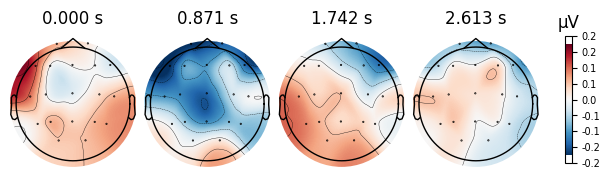

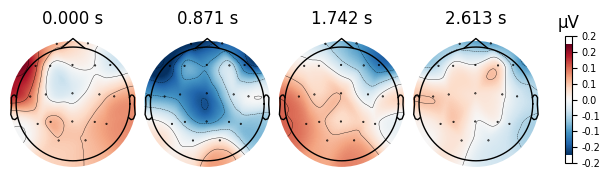

In [127]:
test.plot_topomap()

NOTE: plot_psd_topomap() is a legacy function. New code should use .compute_psd().plot_topomap().
    Using multitaper spectrum estimation with 7 DPSS windows


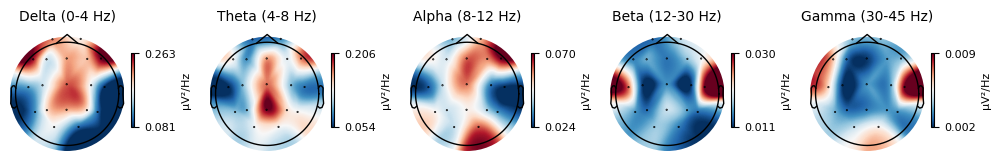

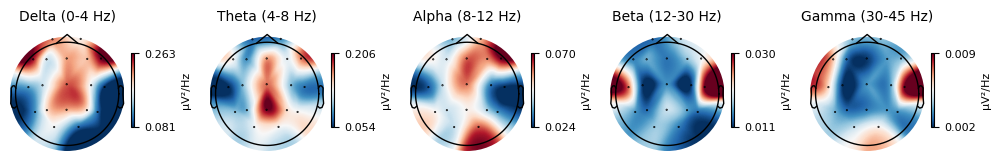

In [128]:
test.plot_psd_topomap(cmap='RdBu_r')

In [129]:
#test.plot_psd(dB=False)
#test.plot_psd()
psd=test.compute_psd()

    Using multitaper spectrum estimation with 7 DPSS windows


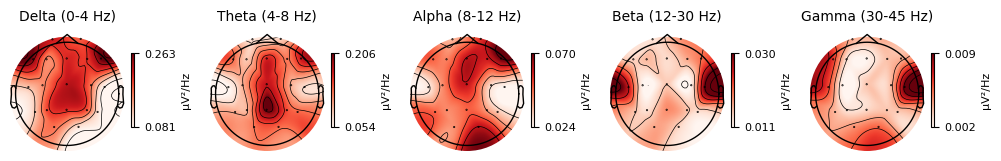

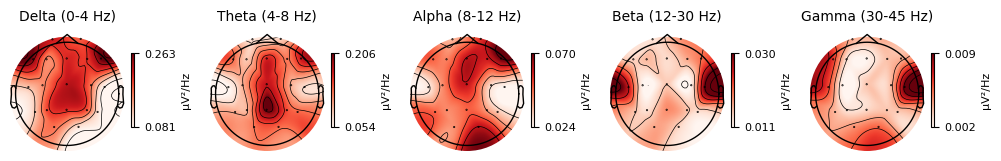

In [130]:
psd.plot_topomap()